**Dataset**

In [ ]:
# Name: SMSSpamCollection

# Location: https://mitu.co.in/dataset

**Import the libraries**

In [ ]:
import pandas as pd

import seaborn as sns

**Read the data**

In [ ]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'text'])

In [ ]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**Separate the input and output data**

In [ ]:
#input data
x = df['text']
y = df['label']

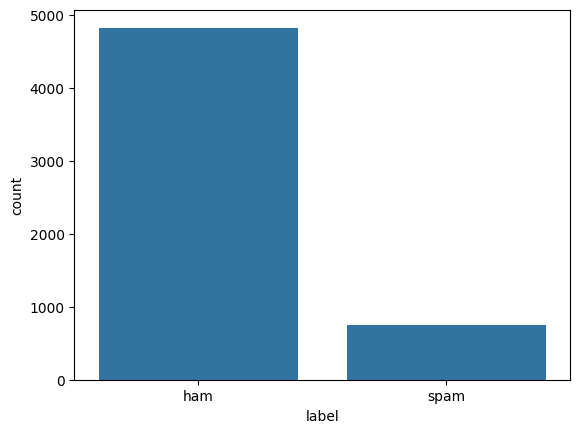

In [ ]:
sns.countplot(x = y);

In [ ]:
pip install imbalanced-learn

**Data Preparation**

Data Cleaning

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
swords = stopwords.words('english')

ps = PorterStemmer

In [ ]:
#Define a function for text cleaning

def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x for x in tokens2 if x not in swords]
    return tokens3

In [ ]:
new_sent = 'It was the expected result. They told the same on fields.'

In [ ]:
clean_text(new_sent)

['expected', 'result', 'told', 'fields']

**TFIDFVectorization**

In [ ]:
#Import the class

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Create the object

tfidf = TfidfVectorizer(analyzer=clean_text)

In [ ]:
#Perform the operation

x_new = tfidf.fit_transform(x)

In [ ]:
x_new.shape

(5572, 7217)

In [ ]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [ ]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

**Encoding of output variable**

In [ ]:
#Import the class

from sklearn.preprocessing import LabelEncoder

In [ ]:
#Create the object

le = LabelEncoder()

In [ ]:
#Apply the encoding

y_new = le.fit_transform(y)

In [ ]:
y_new

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [ ]:
le.inverse_transform([0])

array(['ham'], dtype=object)

In [ ]:
le.inverse_transform([1])

array(['spam'], dtype=object)

**Cross Validation**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, random_state = 0)

In [ ]:
x_train.shape

(4179, 7217)

In [ ]:
x_test.shape

(1393, 7217)

**Define the neural network model**

In [ ]:
pip install tensorflow keras -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
from keras.models import Sequential

from keras.layers import Dense


In [ ]:
#Create the object of NN model

model = Sequential()

#Create first/input layer

layer1 = Dense(64, input_shape=(7217, ), activation='relu')
model.add(layer1)

#Create the hidden layer

layer2 = Dense(128, activation='relu')
model.add(layer2)

#Create the output layer

layer3= Dense(1, activation='sigmoid') #multiclass: activation - softmax, number of neurons = number of classes
model.add(layer3)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         461,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 470,401 (1.79 MB)

 Trainable params: 470,401 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

**Visualize the model**

In [ ]:
from keras.utils import plot_model

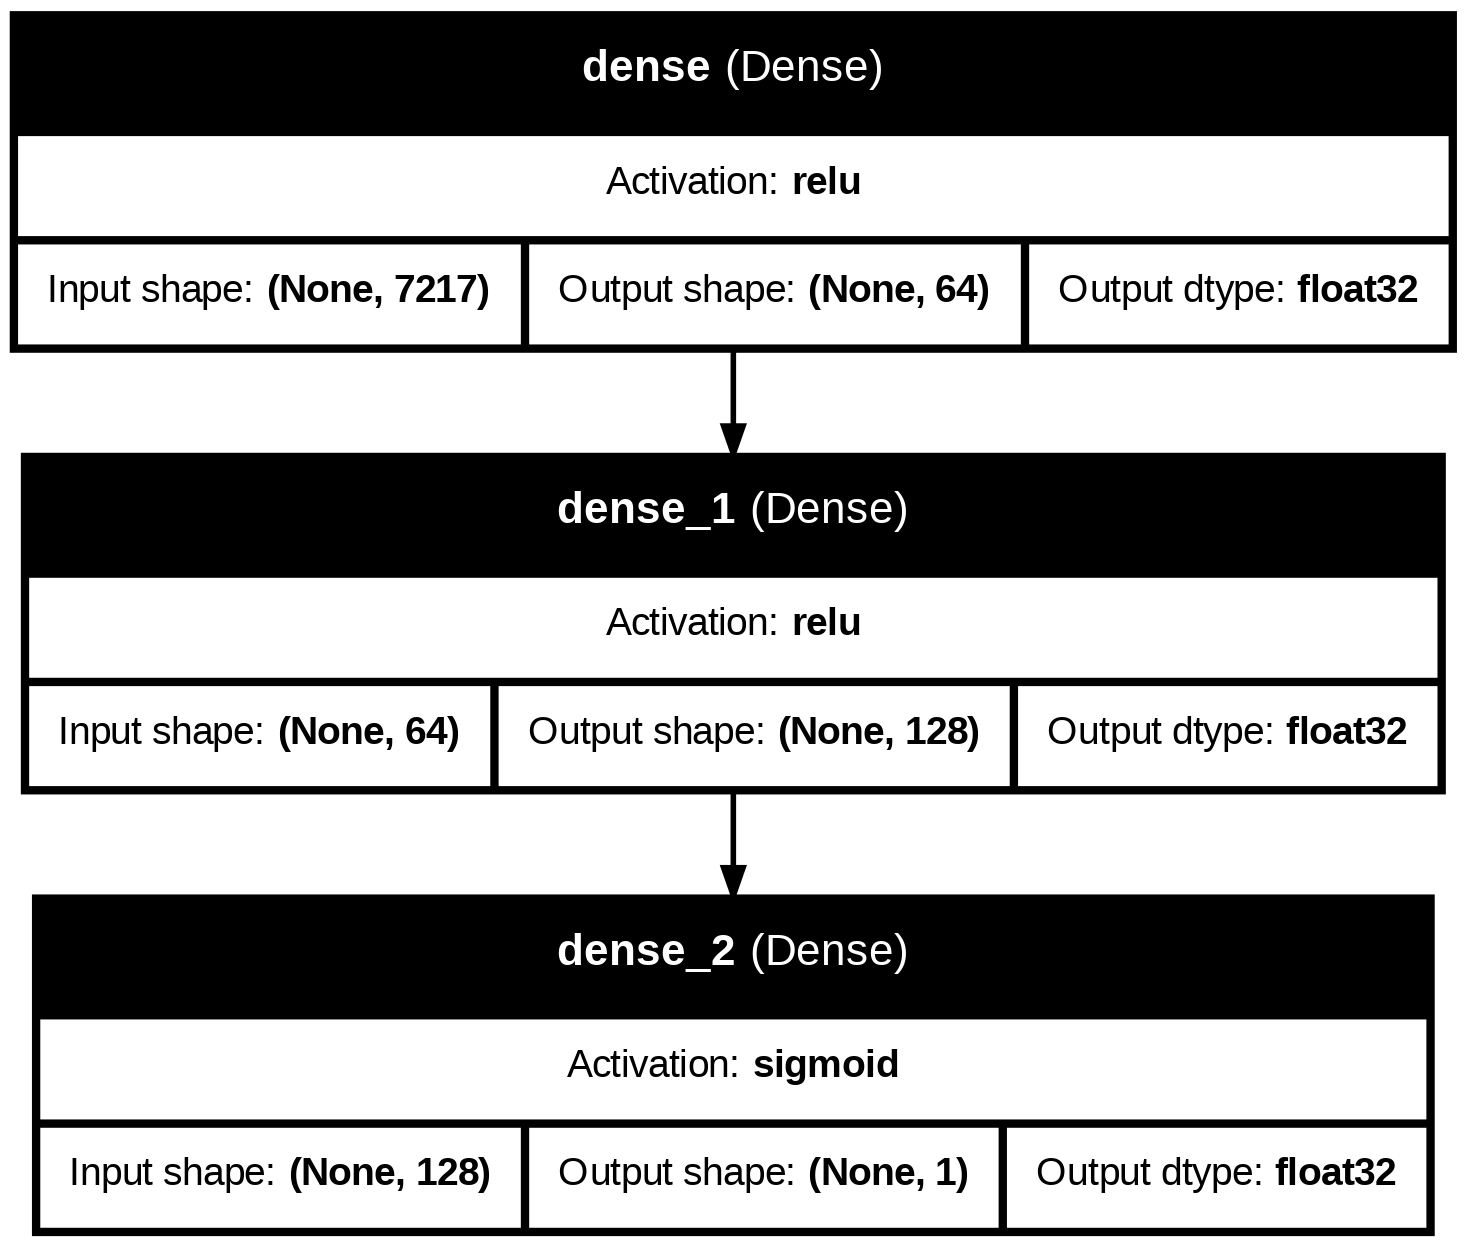

In [ ]:
plot_model(model, show_dtype=True, show_layer_activations=True, show_layer_names=True, show_shapes=True)

**Compile the model**

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#multi-class: loss'categorical_crossentropy'

**Train the model**

In [ ]:
model.fit(x_train.toarray(), y_train, epochs=10, batch_size=10)

Epoch 1/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8879 - loss: 0.3396
Epoch 2/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9930 - loss: 0.0280
Epoch 3/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9976 - loss: 0.0089
Epoch 4/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9991 - loss: 0.0036
Epoch 5/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 7.1636e-04
Epoch 6/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9994 - loss: 0.0026
Epoch 7/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 1.0000 - loss: 1.9805e-04
Epoch 8/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9997 - loss: 0.0021
Epoch 9/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9997 - loss: 0.0018
Epoch 10/10
418/418 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9999 - loss: 5.0434e-04


**Evaluate the model on testing data**

In [ ]:
model.evaluate(x_test.toarray(), y_test, batch_size=1)

1393/1393 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9830 - loss: 0.0896


[0.12100445479154587, 0.9791816473007202]

**Prediction on unseen new data**

In [ ]:
#Dataset: sample.csv

#Location: https://mitu.co.in/dataset

In [ ]:
f = open('sample.csv')

In [ ]:
new_data = f.readlines()

In [ ]:
new_data

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [ ]:
tfidf.transform(new_data)

<3x7217 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf.transform(new_data).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
model.predict(tfidf.transform(new_data).toarray())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


array([[7.8343478e-11],
       [9.9997330e-01],
       [1.5569443e-05]], dtype=float32)

In [ ]:
pred = model.predict(tfidf.transform(new_data).toarray())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [ ]:
pred[0]

array([7.834348e-11], dtype=float32)

In [ ]:
pred[1]

array([0.9999733], dtype=float32)

In [ ]:
pred[2]

array([1.5569443e-05], dtype=float32)

In [ ]:
if pred[0] > 0.5:
    print(le.inverse_transform([1]))
else:
    print(le.inverse_transform([0]))

['ham']


In [ ]:
if pred[1] > 0.5:
    print(le.inverse_transform([1]))
else:
    print(le.inverse_transform([0]))

['spam']


In [ ]:
if pred[2] > 0.5:
    print(le.inverse_transform([1]))
else:
    print(le.inverse_transform([0]))

['ham']
